<a href="https://colab.research.google.com/github/BrunaMko/IA-Projects/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import yfinance
pd.options.mode.chained_assignment = None


In [2]:
yfinance.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
acao = 'PETR3.SA'

inicio = "2014-12-31"
final = "2022-09-15"

df_cotacoes = pdr.get_data_yahoo(acao,inicio,final)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df_cotacoes

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.580000,9.670000,9.000000,9.000000,3.128974,12710900
2015-01-05,8.640000,8.960000,8.250000,8.270000,2.875180,25730600
2015-01-06,8.280000,8.530000,7.780000,8.060000,2.802170,29754600
2015-01-07,8.300000,8.510000,8.080000,8.450000,2.937759,34128300
2015-01-08,8.600000,9.260000,8.520000,9.020000,3.135928,37487300
...,...,...,...,...,...,...
2022-09-08,36.119999,36.540001,35.209999,35.540001,22.782528,14310900
2022-09-09,36.220001,36.450001,35.450001,35.480000,22.744068,9017600
2022-09-12,35.900002,36.500000,35.320000,35.330002,22.647911,15413700


In [5]:
cotacao = df_cotacoes['Close'].to_numpy().reshape(-1,1)
cotacao

array([[ 9.        ],
       [ 8.27000046],
       [ 8.06000042],
       ...,
       [35.33000183],
       [34.25999832],
       [34.68000031]])

In [6]:
tamanho_dados_treinamento = int(len(cotacao) *0.8)
tamanho_dados_treinamento

1532

In [7]:
escalador = MinMaxScaler(feature_range=(0,1))
dados_treinamento = escalador.fit_transform(cotacao[0:tamanho_dados_treinamento,:])
dados_teste = escalador.transform(cotacao[tamanho_dados_treinamento:,:])
dados_entre_0_e_1 = list(dados_treinamento.reshape(len(dados_treinamento))) + list(dados_teste.reshape(len(dados_teste)))

dados_entre_0_e_1= np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1),1)
dados_entre_0_e_1





array([[0.11220044],
       [0.08569356],
       [0.07806828],
       ...,
       [1.06826438],
       [1.02941168],
       [1.04466229]])

In [8]:
dados_para_treinamento = dados_entre_0_e_1[0:tamanho_dados_treinamento,:]

treinamento_x=[]
treinamento_y=[]

for i in range(60, len(dados_para_treinamento)):
  treinamento_x.append(dados_para_treinamento[i-60:i,0])
  treinamento_y.append(dados_para_treinamento[i,0])

  if i<=61:
    print(treinamento_x)
    print(treinamento_y)



[array([0.11220044, 0.08569356, 0.07806828, 0.09222948, 0.11292667,
       0.12273057, 0.10384897, 0.1060276 , 0.09404503, 0.12127814,
       0.12055191, 0.10784314, 0.10820626, 0.12890342, 0.14161222,
       0.13108208, 0.13180828, 0.13543937, 0.09876544, 0.09295571,
       0.07734205, 0.09658677, 0.14088598, 0.14488016, 0.13616557,
       0.11328975, 0.11946259, 0.1060276 , 0.10675383, 0.12563544,
       0.14052287, 0.14669571, 0.13543937, 0.13180828, 0.12599855,
       0.13907044, 0.12309369, 0.11946259, 0.12962961, 0.12236746,
       0.13071896, 0.11764705, 0.11982571, 0.11546842, 0.10457516,
       0.08750907, 0.09295571, 0.08605664, 0.08133623, 0.08496732,
       0.1016703 , 0.11546842, 0.10094407, 0.11801016, 0.12018883,
       0.12091503, 0.13834424, 0.12055191, 0.12018883, 0.13362383])]
[0.13326071003232104]
[array([0.11220044, 0.08569356, 0.07806828, 0.09222948, 0.11292667,
       0.12273057, 0.10384897, 0.1060276 , 0.09404503, 0.12127814,
       0.12055191, 0.10784314, 0.108

In [9]:
treinamento_x,treinamento_y = np.array(treinamento_x),np.array(treinamento_y)

print(treinamento_x)

treinamento_x=treinamento_x.reshape(treinamento_x.shape[0],treinamento_x.shape[1],1)

print(treinamento_x)

[[0.11220044 0.08569356 0.07806828 ... 0.12055191 0.12018883 0.13362383]
 [0.08569356 0.07806828 0.09222948 ... 0.12018883 0.13362383 0.13326071]
 [0.07806828 0.09222948 0.11292667 ... 0.13362383 0.13326071 0.15141612]
 ...
 [0.72585327 0.71314447 0.74037759 ... 0.61837328 0.5896877  0.58460421]
 [0.71314447 0.74037759 0.7534495  ... 0.5896877  0.58460421 0.58097311]
 [0.74037759 0.7534495  0.77305738 ... 0.58460421 0.58097311 0.54684092]]
[[[0.11220044]
  [0.08569356]
  [0.07806828]
  ...
  [0.12055191]
  [0.12018883]
  [0.13362383]]

 [[0.08569356]
  [0.07806828]
  [0.09222948]
  ...
  [0.12018883]
  [0.13362383]
  [0.13326071]]

 [[0.07806828]
  [0.09222948]
  [0.11292667]
  ...
  [0.13362383]
  [0.13326071]
  [0.15141612]]

 ...

 [[0.72585327]
  [0.71314447]
  [0.74037759]
  ...
  [0.61837328]
  [0.5896877 ]
  [0.58460421]]

 [[0.71314447]
  [0.74037759]
  [0.7534495 ]
  ...
  [0.5896877 ]
  [0.58460421]
  [0.58097311]]

 [[0.74037759]
  [0.7534495 ]
  [0.77305738]
  ...
  [0.5846

In [10]:
#Construção do modelo

modelo = Sequential()

#modelo com 50 neuronios
modelo.add(LSTM(50,return_sequences = True, input_shape= (treinamento_x.shape[1],1)))
modelo.add(LSTM(50,return_sequences = False))
modelo.add(Dense(25))
modelo.add(Dense(1))

treinamento_x.shape[1]

60

In [11]:
#compilar o modelo e medir o erro do modelo

modelo.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [12]:
modelo.fit(treinamento_x,treinamento_y,batch_size=1,epochs=1)

1472/1472 [==============================] - 53s 29ms/step - loss: 0.0042


In [13]:
#criar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento-60:,:]

teste_x=[]
teste_y=cotacao[tamanho_dados_treinamento:,:]

for i in range(60, len(dados_teste)):
  teste_x.append(dados_teste[i-60:i,0])




In [14]:
teste_x = np.array(teste_x)

teste_x = teste_x.reshape(teste_x.shape[0],teste_x.shape[1], 1)

In [15]:
#predições do modelo

predicoes = modelo.predict(teste_x)

#tira as escalas dos dados
predicoes = escalador.inverse_transform(predicoes)

12/12 [==============================] - 1s 21ms/step


In [16]:
#erro médio quadrático
rmse = np.sqrt(np.mean(predicoes - teste_y)**2)

In [17]:
#Criação do gráfico

treinamento = df_cotacoes.iloc[:tamanho_dados_treinamento,:]
df_teste = pd.DataFrame({'Close': df_cotacoes['Close'].iloc[tamanho_dados_treinamento:],
                         'predicoes' : predicoes.reshape((len(predicoes)))})

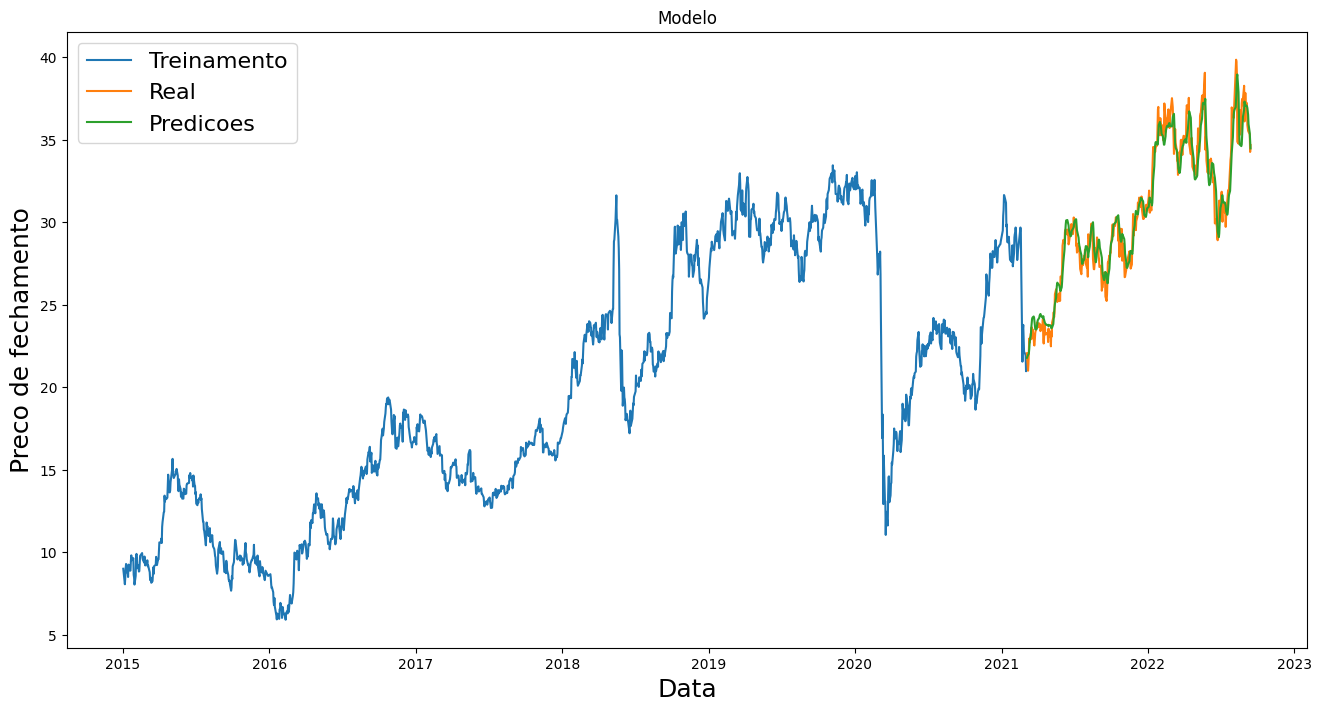

In [18]:
plt.figure(figsize = (16,8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preco de fechamento',fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predicoes'], loc = 2, prop={'size':16})



In [19]:
df_teste.sort_index()

,Close,predicoes
Date,,
2021-03-05,22.059999,21.775537
2021-03-08,21.000000,21.954060
2021-03-09,21.389999,21.992857
2021-03-10,22.290001,22.054346
2021-03-11,22.950001,22.309063
...,...,...
2022-09-08,35.540001,36.510872
2022-09-09,35.480000,35.946774
2022-09-12,35.330002,35.423752


In [20]:
df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao']>0, True,False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo']>0, True,False)
df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero']==df_teste['var_modelo_maior_menor_que_zero'], True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2021-03-05,22.059999,21.775537,NaN,NaN,False,False,True,NaN
2021-03-08,21.000000,21.954060,-0.048051,0.008198,False,True,False,0.048051
2021-03-09,21.389999,21.992857,0.018571,0.001767,True,True,True,0.018571
2021-03-10,22.290001,22.054346,0.042076,0.002796,True,True,True,0.042076
2021-03-11,22.950001,22.309063,0.029610,0.011549,True,True,True,0.029610
...,...,...,...,...,...,...,...,...
2022-09-08,35.540001,36.510872,-0.010028,-0.011480,False,False,True,0.010028
2022-09-09,35.480000,35.946774,-0.001688,-0.015450,False,False,True,0.001688
2022-09-12,35.330002,35.423752,-0.004228,-0.014550,False,False,True,0.004228


In [21]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])

errou_lado = 1-acertou_lado

media_lucro= df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.018441
True     0.017058
Name: variacao_percentual_acao_abs, dtype: float64
0.9250126596540634
0.4751958224543081
-0.1571937297203778


In [22]:
data_hoje = datetime.now()

if data_hoje.hour>18:
  final = data_hoje
  inicial = datetime_now() - timedelta(days = 252)

else:
  final = data_hoje - timedelta(days=1)
  inicial = datetime.now() - timedelta(days = 252)

cotacoes = pdr.get_data_yahoo(acao, inicial, final)
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1,1)
ultimos_60_dias_escalados = escalador.transform(ultimos_60_dias)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalados)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco=escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)




[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 47ms/step
[[38.56903]]
